In [1]:
# Task 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_wine = pd.read_csv("Wine_New.csv")


In [2]:
#1.(1)

print(" The number of poor-quality wine: ",len(data_wine[ data_wine['quality'] < 6 ]))

 The number of poor-quality wine:  1018


In [3]:
#(2)
wine_features_df = data_wine[['quality','density','residual sugar','volatile acidity']]
wine_features_df.corr()

,quality,density,residual sugar,volatile acidity
quality,1.000000,-0.225504,-0.023050,-0.213460
density,-0.225504,1.000000,0.839781,0.062720
residual sugar,-0.023050,0.839781,1.000000,0.092867
volatile acidity,-0.213460,0.062720,0.092867,1.000000


Density and volatile acidity have stronger linear association with quality than residual sugar. Fit a model quality ~ density and volatile acidity.

In [4]:
#2(1)
from sklearn.model_selection import train_test_split

X = data_wine.iloc[:,:-1]
y = data_wine.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)


In [5]:
#(2)
from sklearn.linear_model import LinearRegression

lr_obj_intercept = LinearRegression(fit_intercept = True)
lr_obj_intercept.fit(X_train, y_train)


lr_obj_no_intercept = LinearRegression(fit_intercept = False)
lr_obj_no_intercept.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [6]:
#(3)

# #For the intercept value
# print(lr_obj_intercept.intercept_)
# # For other beta
# print(lr_obj_intercept.coef_)        

def get_loss(x_test, y_test, intercept, coef):
    
    X_test_add_one = np.column_stack((x_test,np.ones(len(x_test))))
    
    coef_add_interceft = np.append(coef,intercept)

    model_0 = np.dot(X_test_add_one, coef_add_interceft)

    loss_temp = model_0 - y_test

    return np.sum(np.square(loss_temp)) / (2 * (len(X_test)))

print("The loss of regression with intercept: ",get_loss(X_test,y_test,lr_obj_intercept.intercept_,lr_obj_intercept.coef_))
print("The loss of regression without intercept: ",get_loss(X_test,y_test,lr_obj_no_intercept.intercept_,lr_obj_no_intercept.coef_))


The loss of regression with intercept:  0.04408878343551022
The loss of regression without intercept:  0.0938192131663866


In [7]:
#3(1)
centred = lambda x: x-x.mean()

centred_y_train = centred(y_train)

new_FA_train = centred(X_train['fixed acidity'])

new_VA_train = centred(X_train['volatile acidity'])

new_CA_train = centred(X_train['critric acid'])

new_RS_train = centred(X_train['residual sugar'])

new_CH_train = centred(X_train['chlorides'])

new_FSD_train = centred(X_train['free sulfur dioxide'])

new_TSD_train = centred(X_train['total sulfur dioxide'])

new_DS_train = centred(X_train['density'])

new_PH_train = centred(X_train['pH'])

new_SP_train = centred(X_train['sulphates'])

new_AL_train = centred(X_train['alcohol'])

centred_X_train = pd.DataFrame([new_FA_train,new_VA_train,new_CA_train,new_RS_train,new_CH_train,new_FSD_train,new_TSD_train,new_DS_train,new_PH_train,new_SP_train,new_AL_train]).transpose()



In [8]:
centred_X_train

,fixed acidity,volatile acidity,critric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1161,3.367848,0.023833,0.832092,10.547938,0.057889,15.604033,-149.791402,0.005639,-0.180091,0.209865,2.065497
2355,-0.301812,0.203833,-0.230376,0.697938,0.168466,135.522161,17.236683,-0.002361,-0.207523,-0.106579,-1.733716
1831,-3.042972,0.213833,-0.141191,8.797938,-0.011418,4.304266,-133.131535,0.001139,0.503380,-0.259883,-0.076461
156,-1.182951,-0.036167,0.527378,7.697938,0.084056,76.096122,179.311296,0.003739,0.567958,-0.019416,0.824679
195,0.950162,0.023833,-0.417196,-2.802062,-0.037662,-19.169989,-78.570810,0.000039,0.416938,-0.332385,1.625219
616,1.210209,0.043833,-0.452891,-3.902062,0.111811,-92.138989,-167.142239,-0.002961,0.231204,0.043362,2.973268
2812,4.342816,-0.116167,0.651832,-4.702062,-0.028005,-122.543081,-167.244751,-0.000761,-0.498157,-0.204818,1.123834
3069,-4.883024,0.253833,0.552624,-0.202062,-0.011503,35.510394,196.188509,-0.002981,0.252005,0.332093,0.086194
2223,1.318805,-0.046167,-0.011523,6.497938,0.136273,72.055059,33.183810,0.003839,0.154925,0.326208,1.580962
5,0.880683,0.003833,0.500447,0.597938,0.017497,24.980315,-82.858651,0.000939,0.431336,-0.132852,-0.897186


In [9]:
#3(2)
lr_obj_centred = LinearRegression()
lr_obj_centred.fit(centred_X_train, centred_y_train)

print("The coefficients of regression with centred data: \n ", lr_obj_centred.coef_)
print("The intercept of regression with centred data: \n", lr_obj_centred.intercept_)
centred_X_test = centred( X_test)
centred_y_test = centred( y_test)

print("The loss of regression with centred data: ",get_loss(centred_X_test,centred_y_test,lr_obj_centred.intercept_, lr_obj_centred.coef_))

The coefficients of regression with centred data: 
  [ 1.06178984e-01 -1.81652548e+00 -1.13278471e-02  9.60281440e-02
 -6.92019660e-01  4.45600635e-03 -3.61260704e-04 -1.93013454e+02
  8.26661990e-01  6.23347316e-01  1.39425673e-01]
The intercept of regression with centred data: 
 8.701195627973102e-13
The loss of regression with centred data:  0.04408760013659672


In [10]:
print("The coefficient R^2 of regressiong with intercept: ",lr_obj_intercept.score(X_test,y_test))
print("The coefficient R^2 of regressiong without intercept: ",lr_obj_no_intercept.score(X_test,y_test))
print("The coefficient R^2 of regressiong with centered data and  intercept: ",lr_obj_centred.score(centred_X_test,centred_y_test))

The coefficient R^2 of regressiong with intercept:  0.8591887148713042
The coefficient R^2 of regressiong without intercept:  0.7003590721652427
The coefficient R^2 of regressiong with centered data and  intercept:  0.859192494105561


In [11]:
#4(1)
poor_quality_wine  = data_wine[ data_wine['quality'] < 6 ].sample(n=200, random_state=0)

good_quality_wine  = data_wine[ data_wine['quality'] >= 6 ].sample(n=200, random_state=0)

wine_concat = pd.concat([good_quality_wine,poor_quality_wine])


In [12]:
#(2)
from sklearn.linear_model import LassoCV

X_wine = wine_concat.iloc[:,:-1]
y_wine = wine_concat.iloc[:,-1]

X_wine_centred = centred( X_wine )
y_wine_centred = centred( y_wine )

X_lasso_train, X_lasso_test, y_lasso_train, y_lasso_test = train_test_split(X_wine_centred, y_wine_centred,test_size=0.2,random_state=0)


X_wine_centred = centred( X_wine )
y_wine_centred = centred( y_wine )


lascv = LassoCV(cv=5, random_state=0)
lascv.fit(X_lasso_train, y_lasso_train)

print("LASSO Lambda: {0}".format(lascv.alpha_))

def get_loss_lasso(x_test, y_test, intercept, coef, Lambda):
    
    X_test_add_one = np.column_stack((x_test,np.ones(len(x_test))))
    
    coef_add_interceft = np.append(coef,intercept)

    model_0 = np.dot(X_test_add_one, coef_add_interceft)

    loss_temp = model_0 - y_test

    lasso = Lambda * ( np.sum( np.abs(coef_add_interceft) ) )
    return (np.sum(np.square(loss_temp)) )/ (2 * (len(X_test))) 


def get_loss(x_test, y_test, intercept, coef):
    
    X_test_add_one = np.column_stack((x_test,np.ones(len(x_test))))
    
    coef_add_interceft = np.append(coef,intercept)

    model_0 = np.dot(X_test_add_one, coef_add_interceft)

    loss_temp = model_0 - y_test

    return np.sum(np.square(loss_temp)) / (2 * (len(X_test)))


LASSO Lambda: 0.03781501842857406


In [13]:
#(3)

preds_lasso = lascv.predict(X_lasso_test)

print("The loss of regression with lasso: ",get_loss_lasso(X_lasso_test,y_lasso_test,lascv.intercept_, lascv.coef_,lascv.alpha_ ))


The loss of regression with lasso:  0.013872487488498961


In [14]:
get_loss(X_lasso_test,y_lasso_test,lascv.intercept_,lascv.coef_)

0.013872487488498961

In [15]:
# Task 2

#1
loans_data = pd.read_excel("Loans_Data_New.xlsx")


dummy = pd.get_dummies(loans_data,drop_first = True)


dummy.describe()


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,inq_last_6mths,total_pymnt,total_pymnt_inv,...,addr_state_SD,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,debt_settlement_flag_Y
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,...,565.00000,565.000000,565.00000,565.000000,565.00000,565.000000,565.000000,565.000000,565.00000,565.000000
mean,13039.469027,12623.362832,12263.498532,0.132404,372.314867,63990.414425,14.521009,0.991150,13233.126934,12839.506124,...,0.00177,0.072566,0.00177,0.035398,0.00177,0.024779,0.014159,0.007080,0.00177,0.283186
std,7846.395883,7335.373208,7164.897656,0.039057,208.949707,37034.292456,6.408200,1.341479,8743.003971,8539.098131,...,0.04207,0.259653,0.04207,0.184948,0.04207,0.155588,0.118252,0.083917,0.04207,0.450945
min,1000.000000,1000.000000,0.000000,0.057900,35.310000,12000.000000,0.370000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,7200.000000,7200.000000,7000.000000,0.106500,215.690000,40000.000000,9.860000,0.000000,6858.700001,6461.140000,...,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,11100.000000,11000.000000,10500.000000,0.126900,337.750000,55000.000000,14.650000,1.000000,11264.480000,11123.650000,...,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,18000.000000,17000.000000,16060.110690,0.162900,474.190000,78000.000000,19.740000,2.000000,17402.239990,16917.780000,...,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,1.000000
max,35000.000000,35000.000000,35000.000000,0.239100,1269.730000,290000.000000,29.850000,14.000000,48587.490000,48587.490000,...,1.00000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000


In [16]:
def status(x) : 
    return pd.DataFrame([x.median(),x.mad(),x.var(),x.std(),x.skew(),x.kurt()],
                        index=['median','mad','var','std','skew','kurt'])

status(dummy)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,inq_last_6mths,total_pymnt,total_pymnt_inv,...,addr_state_SD,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,debt_settlement_flag_Y
median,1.110000e+04,1.100000e+04,1.050000e+04,0.126900,337.750000,5.500000e+04,14.650000,1.000000,1.126448e+04,1.112365e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mad,6.287526e+03,5.863599e+03,5.683625e+03,0.031739,161.918331,2.591979e+04,5.389035,0.870107,6.852506e+03,6.649081e+03,...,0.003534,0.134601,0.003534,0.068290,0.003534,0.048330,0.027918,0.014059,0.003534,0.405983
var,6.156593e+07,5.380770e+07,5.133576e+07,0.001525,43659.980202,1.371539e+09,41.065026,1.799567,7.644012e+07,7.291620e+07,...,0.001770,0.067420,0.001770,0.034206,0.001770,0.024208,0.013984,0.007042,0.001770,0.203352
std,7.846396e+03,7.335373e+03,7.164898e+03,0.039057,208.949707,3.703429e+04,6.408200,1.341479,8.743004e+03,8.539098e+03,...,0.042070,0.259653,0.042070,0.184948,0.042070,0.155588,0.118252,0.083917,0.042070,0.450945
skew,9.334163e-01,9.105076e-01,9.109400e-01,0.113222,1.015040,2.273726e+00,-0.050117,3.629295,1.075425e+00,1.090009e+00,...,23.769729,3.304037,23.769729,5.041984,23.769729,6.130415,8.246224,11.789602,23.769729,0.965015
kurt,3.622301e-01,4.674896e-01,6.190286e-01,-0.569589,1.252632,8.016694e+00,-0.769692,25.537629,1.022997e+00,1.193511e+00,...,565.000000,8.948326,565.000000,23.504790,565.000000,35.708373,66.234660,137.481369,565.000000,-1.072556


In [17]:

corr = dummy.corr()

corr_potential_positive = corr['debt_settlement_flag_Y'].sort_values(ascending=False)[1:4]
corr_potential_negative = corr['debt_settlement_flag_Y'].sort_values(ascending=False)[-3:]
corr_potential_positive 

term_ 60 months    0.323152
total_rec_int      0.245000
int_rate           0.229406
Name: debt_settlement_flag_Y, dtype: float64

In [18]:
corr_potential_negative

total_rec_prncp          -0.172162
grade_B                  -0.191640
loan_status_Fully Paid   -0.753027
Name: debt_settlement_flag_Y, dtype: float64

In [19]:
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

def loss_logsit(x_test, t ,beta):
    X_test_add_one = np.column_stack((x_test,np.ones(len(x_test))))
    
    model_0 = sigmoid(np.dot(X_test_add_one, beta))
    
    loss_temp = t * np.log(model_0) + (1-t) * np.log(1-model_0) 
    
    return  -( np.sum(loss_temp) / len(x_test) )

def myLogisticGD(X, t, beta, alpha, numIterations):
    
    X_add_one = np.column_stack((X,np.ones(len(X))))
    
    for i in range(0,numIterations):
        hypothesis = np.dot(X_add_one,beta)
        
        h = sigmoid(hypothesis)

        loss = h - t 
        
       
        cost = loss_logsit( X, t,  beta)
        
        loss_total[i]=cost
#        print("Iteration %d | Cost: %f" % (i, cost))
        
        gradient = np.dot(X_add_one.transpose(), loss) / len(X)
        
        beta = beta - alpha * gradient
        
        beta_total[i,:]= beta.transpose()
        
    return beta

def show_loss_and_beta(loss_total,beta_total,alpha):
    
    fig1 = plt.figure()
    plt.plot(loss_total, label = "Loss fucntion")
    plt.plot(beta_total[:,0], label = "Beta0")
    plt.plot(beta_total[:,1], label = "Beta1")
    plt.plot(beta_total[:,2], label = "Beta2")
    plt.legend(loc="upper right")
    plt.xlabel("Number of iteration")
    title = "Alpha: " + str(alpha)
    plt.title(title)
    plt.show()

In [20]:
from sklearn import preprocessing

c =  pd.Series(preprocessing.scale( loans_data['annual_inc']) )

In [21]:
c.head()

0   -0.359186
1   -0.945648
2   -0.648363
3   -0.107845
4    0.297544
dtype: float64

In [22]:
X_loans = pd.DataFrame((c,loans_data['int_rate'])).transpose()
t_loans = pd.get_dummies(loans_data['debt_settlement_flag'],drop_first=True).iloc[:,0]

init_beta = [0.1,0.1,0.1]

#alpha = 0.005

numIterations = 400

loss_total= np.zeros((numIterations,1))
beta_total= np.zeros((numIterations,3))

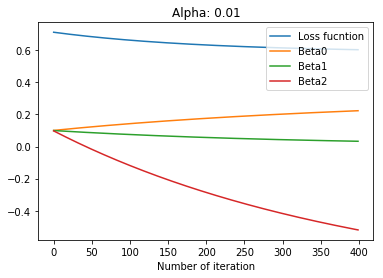

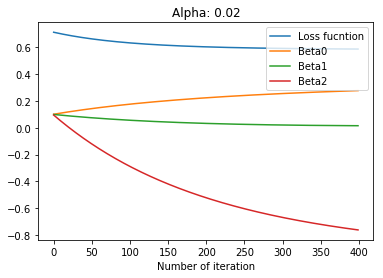

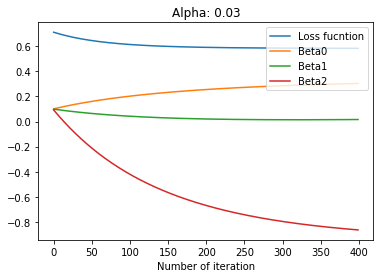

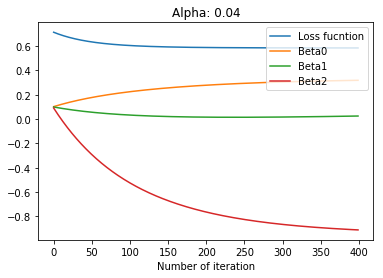

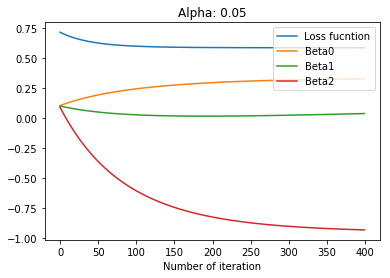

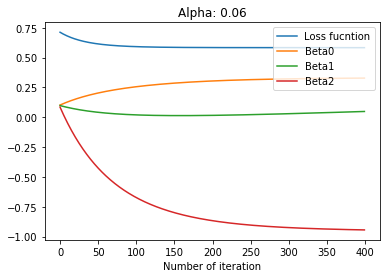

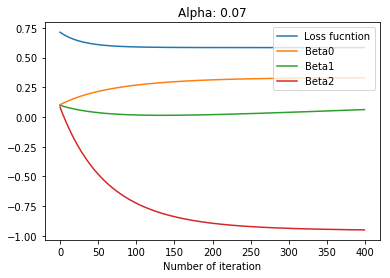

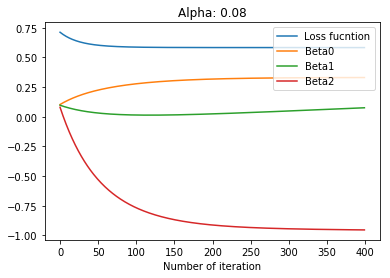

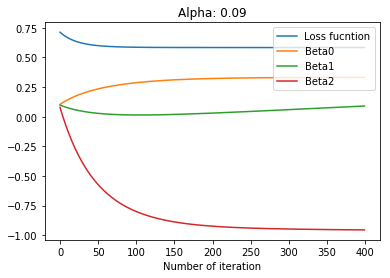

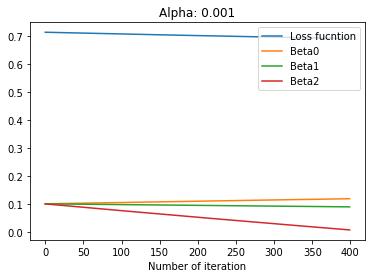

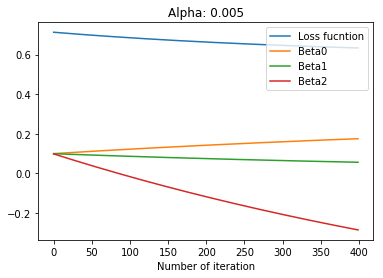

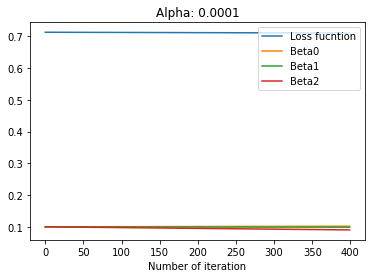

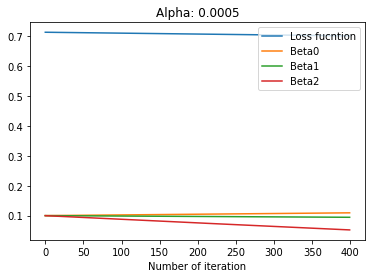

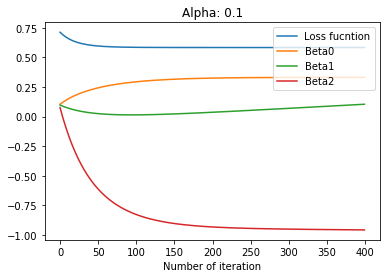

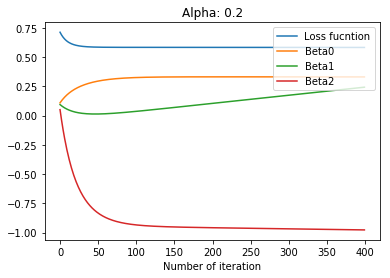

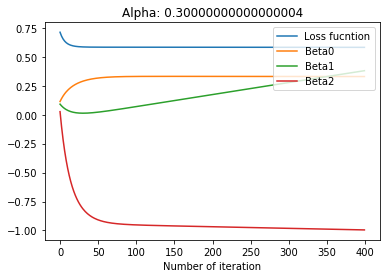

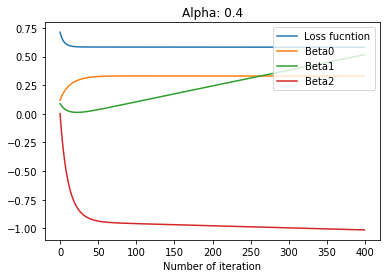

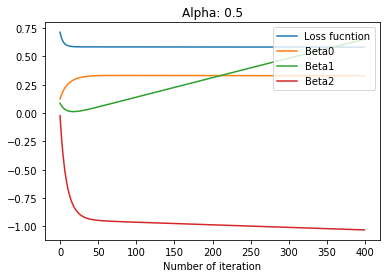

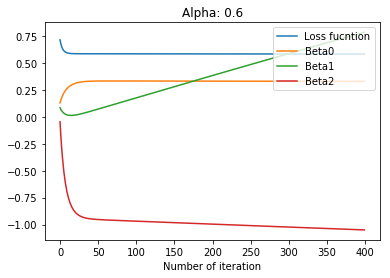

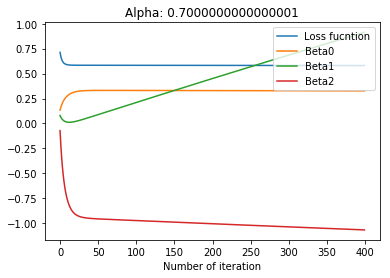

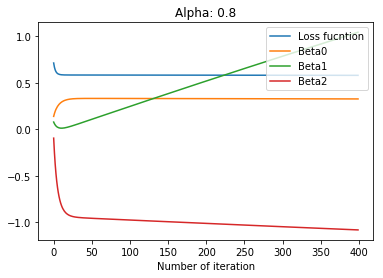

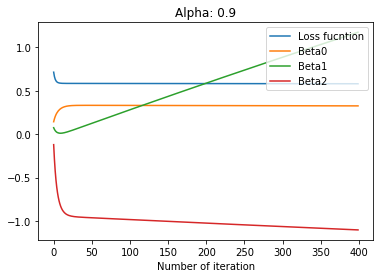

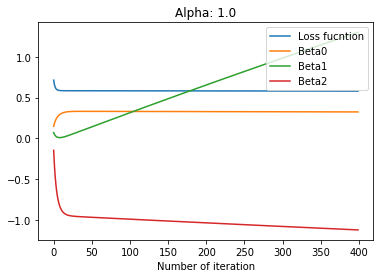

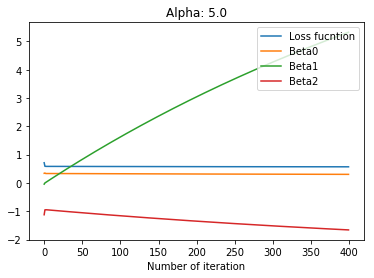

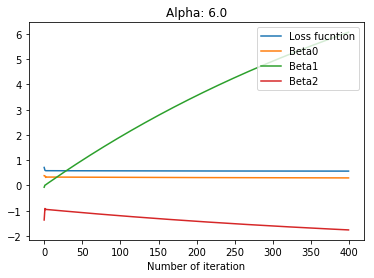

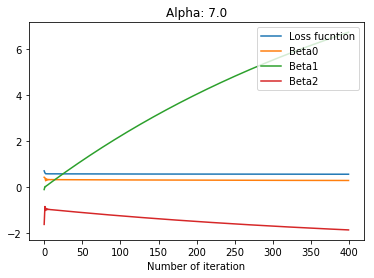

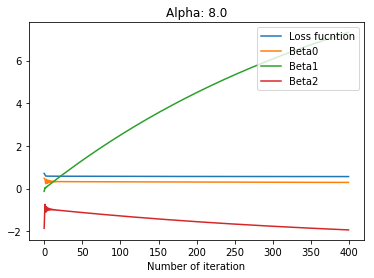

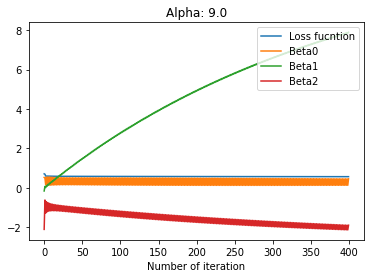

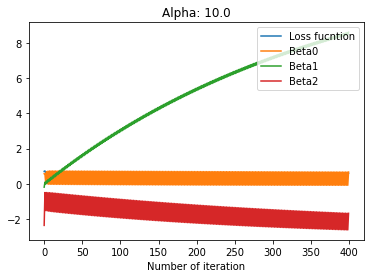

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


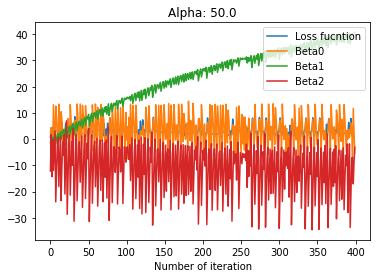

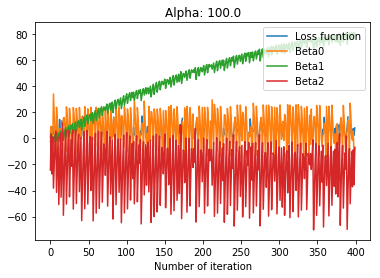

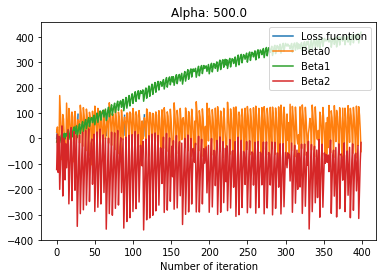

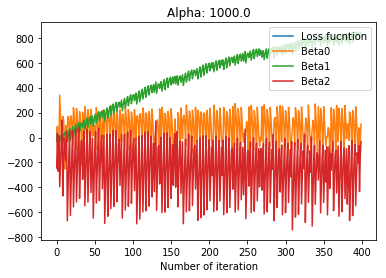

In [23]:
alphas = np.linspace(0.1,1,10)
alphas = np.insert(alphas,0,[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.001,0.005,0.0001,0.0005])
alphas = np.append(alphas,[5,6,7,8,9,10,50,100,500,1000])

for alpha in alphas:
    myLogisticGD(X_loans,t_loans,init_beta,alpha,numIterations)

    show_loss_and_beta(loss_total,beta_total,alpha)



In [24]:
#3

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_sklearn =  dummy[['loan_status_Fully Paid','term_ 60 months','total_rec_int']]
y_sklearn = dummy['debt_settlement_flag_Y']

X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_sklearn,y_sklearn,test_size=0.2,random_state=0)
    
clf = LogisticRegression(random_state=0,fit_intercept = True )

clf.fit(X_sklearn,y_sklearn)

y_log_estimate = clf.predict(X_log_test)


/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
clf.intercept_

array([0.10122242])

In [26]:
clf.coef_

array([[-4.80080243e+00,  3.39212225e-01,  1.37615002e-04]])

In [27]:

beta = np.append(clf.coef_,clf.intercept_)

loss_logsit(X_log_test,y_log_test,beta)

0.28910626037266657